# Region clustering

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import HDBSCAN
import seaborn as sns
plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-light.mplstyle')

In [2]:
df = pd.read_parquet('../data/main_cluster.parquet')
df.shape

(1281, 9)

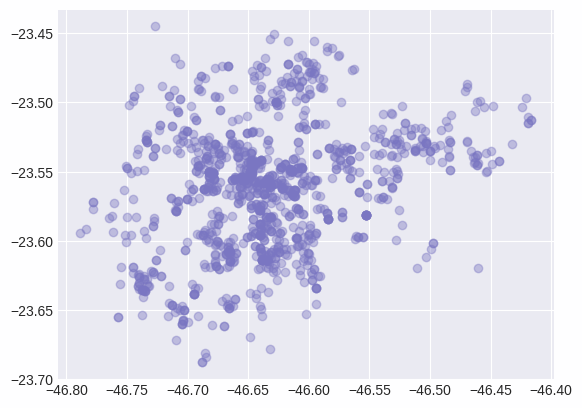

In [3]:
plt.scatter(df.longitude, df.latitude, alpha=0.4);

Agora que temos uma distribuiçao geogradica mais interessante, vamos clusteriza-la utilizando um metodo de clusterizaçao baseado em densidade que e capaz de encontrar relaçoes hierarquicas nos clusters, HDBSCAN

In [41]:
hdb = HDBSCAN(cluster_selection_method='leaf', cluster_selection_epsilon=0.008).fit(df[['longitude', 'latitude']])

df['cluster'] = hdb.labels_

n_clusters_ = len(set(df['cluster'])) - (1 if -1 in df['cluster'] else 0)
n_noise_ = list(df['cluster']).count(-1)

print(f'Estimated number of clusters: {n_clusters_}')
print(f'Estimated number of noise points: {n_noise_}')

Estimated number of clusters: 32
Estimated number of noise points: 110


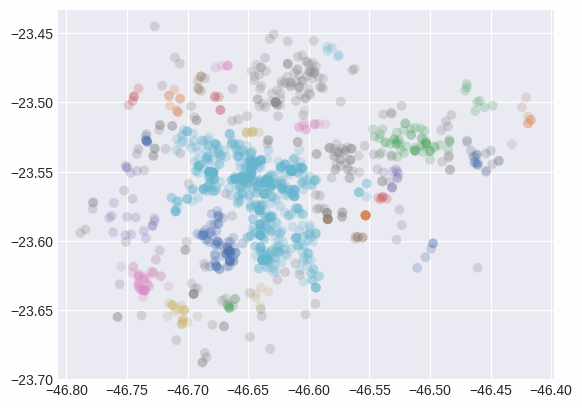

In [42]:
color_palette = sns.color_palette('deep', n_clusters_)
cluster_colors = [color_palette[x] if x >= 0
                  else (0.5, 0.5, 0.5)
                  for x in hdb.labels_]
cluster_member_colors = [sns.desaturate(x, p) for x, p in
                         zip(cluster_colors, hdb.probabilities_)]
plt.scatter(x=df.longitude, y=df.latitude, s=50, linewidth=0, c=cluster_member_colors, alpha=0.25)

<Axes: xlabel='cluster', ylabel='asking_price'>

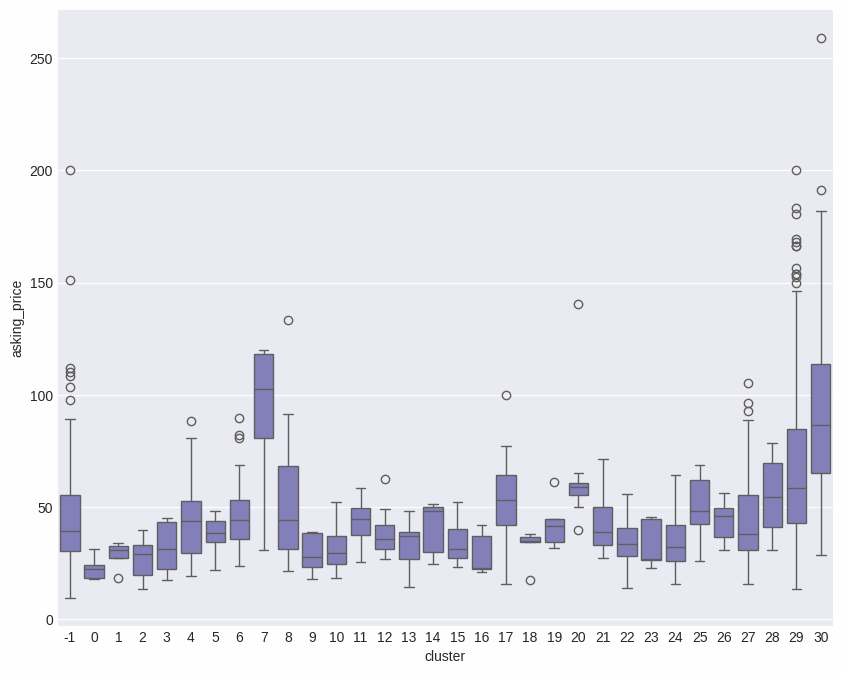

In [43]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(10, 8))

sns.boxplot(x='cluster', y='asking_price', data=df)

vamos descobrir quais sao os bairros que estao nos clusters com maiores preços por metro quadrado

cluster 7

In [44]:
df[df.cluster==7].describe().loc[['mean', 'std']].T

,mean,std
suite_area,61.500000,65.663645
condominium,751.625000,657.094022
tax,106.750000,105.091457
asking_price,90.656923,35.845371
latitude,-23.636553,0.002889
longitude,-46.694671,0.001427
cluster,7.000000,0.000000


In [45]:
print(*[nbh for nbh in df[df.cluster==7].neighborhood.unique()], sep='\n')

Santo Amaro, São Paulo


cluster 30

In [46]:
df[df.cluster==30].describe().loc[['mean', 'std']].T

,mean,std
suite_area,54.888889,36.863874
condominium,1007.236111,754.969088
tax,218.611111,326.081367
asking_price,94.929698,39.917098
latitude,-23.603547,0.010921
longitude,-46.672749,0.008263
cluster,30.000000,0.000000


In [47]:
print(*[nbh for nbh in df[df.cluster==30].neighborhood.unique()], sep='\n')

Vila Olímpia, São Paulo
Itaim Bibi, São Paulo
Brooklin, São Paulo
Moema, São Paulo
Indianópolis, São Paulo
Campo Belo, São Paulo
Jardim Europa, São Paulo


e o cluster grandao que englobou varios dados

In [48]:
df[df.cluster==29].describe().loc[['mean', 'std']].T

,mean,std
suite_area,48.349325,30.475994
condominium,582.349325,423.302094
tax,86.959520,142.236764
asking_price,67.088503,32.415940
latitude,-23.565686,0.025323
longitude,-46.643511,0.027407
cluster,29.000000,0.000000


In [49]:
print(*[nbh for nbh in df[df.cluster==29].neighborhood.unique()], sep='\n')

São João Clímaco, São Paulo
Pinheiros, São Paulo
Bela Vista, São Paulo
República, São Paulo
Vila Buarque, São Paulo
Ipiranga, São Paulo
Sacomã, São Paulo
Mooca, São Paulo
Vila da Saúde, São Paulo
Cambuci, São Paulo
Vila Independência, São Paulo
Santa Cecília, São Paulo
Sumaré, São Paulo
Paraíso, São Paulo
Vila Mariana, São Paulo
Vila do Bosque, São Paulo
Jardim Vila Mariana, São Paulo
Brás, São Paulo
Perdizes, São Paulo
Mirandópolis, São Paulo
Butantã, São Paulo
Parque Fongaro, São Paulo
Barra Funda, São Paulo
Consolação, São Paulo
Chácara Inglesa, São Paulo
Vila Clementino, São Paulo
Higienópolis, São Paulo
Jardim Paulista, São Paulo
Vila Dom Pedro I, São Paulo
Cerqueira César, São Paulo
Liberdade, São Paulo
Campos Elíseos, São Paulo
Saúde, São Paulo
Água Branca, São Paulo
Vila Gumercindo, São Paulo
Morro dos Ingleses, São Paulo
Vila Anglo Brasileira, São Paulo
Sé, São Paulo
Vila Madalena, São Paulo
Vila Romana, São Paulo
Vila Moinho Velho, São Paulo
Aclimação, São Paulo
Jardim Santa 